Creating time series objects in R
100xp
A time series can be thought of as a vector or matrix of numbers along with some information about what times those numbers were recorded. This information is stored in a ts object in R. In most exercises, you will use time series that are part of existing packages. However, if you want to work with your own data, you need to know how to create a ts object in R.

Let's look at an example usnim_2002 below, containing net interest margins for US banks for the year 2002 (source: FFIEC).

`> usnim_2002
               usnim
1   2002-01-01  4.08
2   2002-04-01   4.1
3   2002-07-01  4.06
4   2002-10-01  4.04`

`> # ts(data, start, frequency, ...)
> usnim_ts = ts(usnim_2002[, 2], start = c(2002, 1), frequency = 4)`

The function ts() takes in three arguments:

data is set to everything in usnim_2002 except for the date column; it isn't needed since the ts object will store time information separately.
start is set to the form c(year, period) to indicate the time of the first observation. Here, January corresponds with period 1; likewise, a start date in April would refer to 2, July to 3, and October to 4.
frequency is set to 4 because the data are quarterly.
In this exercise, you will read in some time series data from an xlsx file using read_excel(), a function from the readxl package, and store the data as a ts object. Both the xlsx file and package have been loaded into your workspace.

Instructions
 - Use the read_excel() function to read the data from "exercise1.xlsx" into mydata.
 - Apply head() to mydata in the R console to inspect the first few lines of the data. Take a look at the dates - there are four observations in 1981, indicating quarterly data with a frequency of four rows per year. The first observation or start date is Mar-81, the first of four rows for year 1981, indicating that March corresponds with the first period.
 - Create a ts object called myts using ts(). Set data, start and frequency based on what you observed.

In [1]:
library(readxl)

Warning message:
"package 'readxl' was built under R version 3.3.3"

In [2]:
# Read the data from Excel into R
mydata <- read_excel("exercise1.xlsx")

# Look at the first few lines of mydata
head(mydata)

# Create a ts object called myts
myts <- ts(mydata[,-1], start = c(1981, 1), frequency = 4)

,Sales,AdBudget,GDP
Mar-81,1020.2,659.2,251.8
Jun-81,889.2,589.0,290.9
Sep-81,795.0,512.5,290.8
Dec-81,1003.9,614.1,292.4
Mar-82,1057.7,647.2,279.1
Jun-82,944.4,602.0,254.0


In [3]:
class(myts)
myts[1:5,]

[1] "mts"    "ts"     "matrix"

Sales,AdBudget,GDP
1020.2,659.2,251.8
889.2,589.0,290.9
795.0,512.5,290.8
1003.9,614.1,292.4
1057.7,647.2,279.1



### Time series plots

The first step in any data analysis task is to plot the data. Graphs enable you to visualize many features of the data, including patterns, unusual observations, changes over time, and relationships between variables. Just as the type of data determines which forecasting method to use, it also determines which graphs are appropriate.

You can use the autoplot() function to produce a time plot of the data with or without facets, or panels that display different subsets of data:

`> autoplot(usnim_2002, facets = FALSE)`

The above method is one of the many taught in this course that accepts boolean arguments. Both T and TRUE mean "true", and F and FALSE mean "false", however, T and F can be overwritten in your code. Therefore, you should only rely on TRUE and FALSE to set your indicators for the remainder of the course.

You can also use the which.max() and frequency() functions to identify the smallest index of the maximum value and find the number of observations per unit time, respectively. Recall the usnim_2002 data from the previous exercise:

`> which.max(usnim_2002)
[2] 2`

`> frequency(usnim_2002)
[1] 4`

Because this course involves the use of the forecast and ggplot2 packages, they have been loaded into your workspace for you, as well as myts from the previous exercise and the following three series:`

 - `gold` containing gold prices in US dollars
 - `woolyrnq` containing information on the production of woollen yarn in Australia
 - `gas` containing Australian gas production

Instructions

 - Plot the data you stored as myts using autoplot() with facetting.
 - Plot the same data without facetting by setting the appropriate argument to FALSE. What happens?
 - Plot the gold, woolyrnq, and gas time series in separate plots.
 - Use which.max() to spot the outlier in the gold series. Which observation was it?
 - Apply the frequency() function to each commodity to get the number of observations per unit time. This would return 52 for weekly data, for example.

In [4]:
library(forecast)
library(ggplot2)

Warning message:
"package 'forecast' was built under R version 3.3.3"Warning message:
"package 'ggplot2' was built under R version 3.3.3"

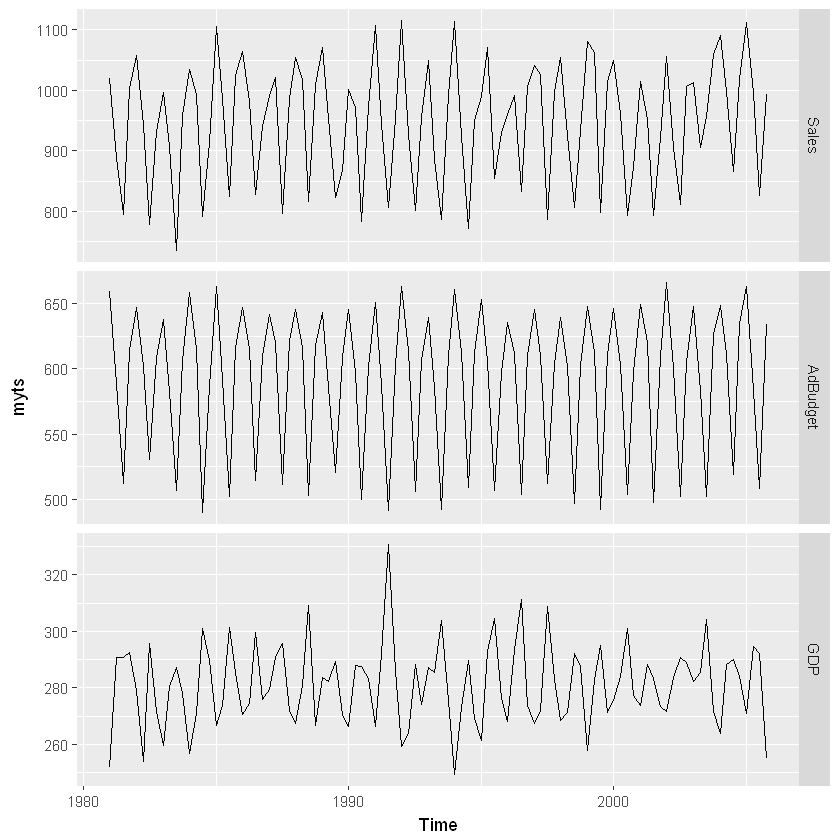

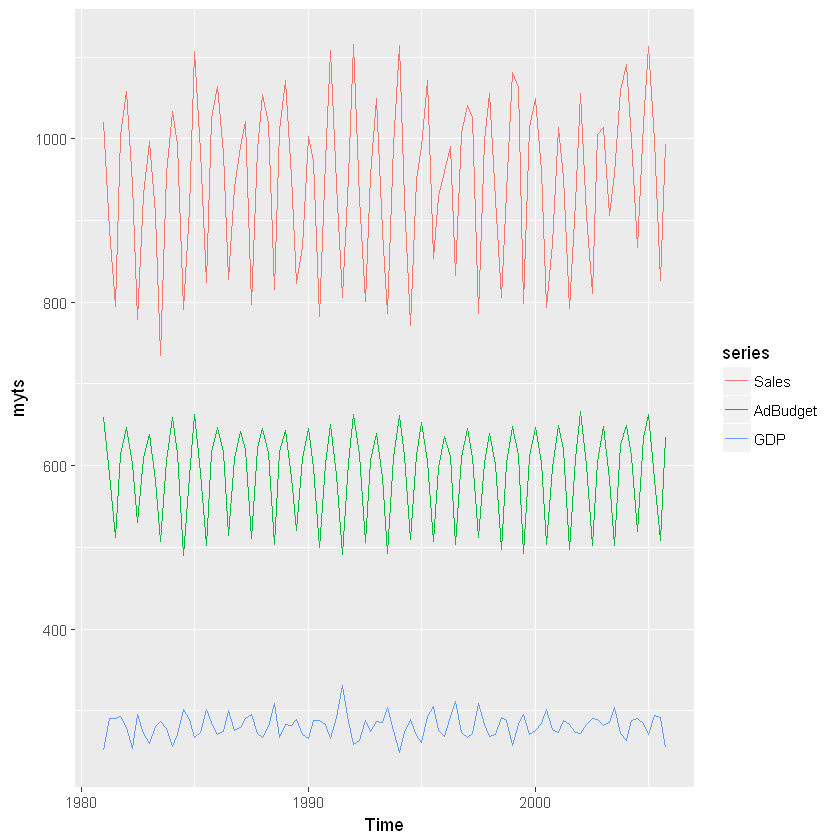

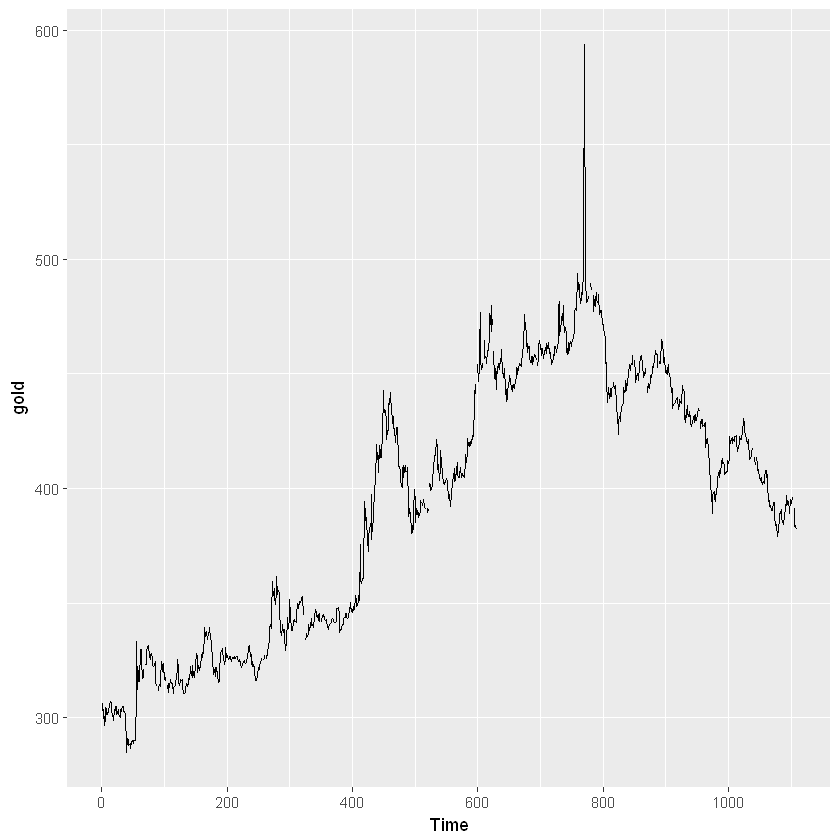

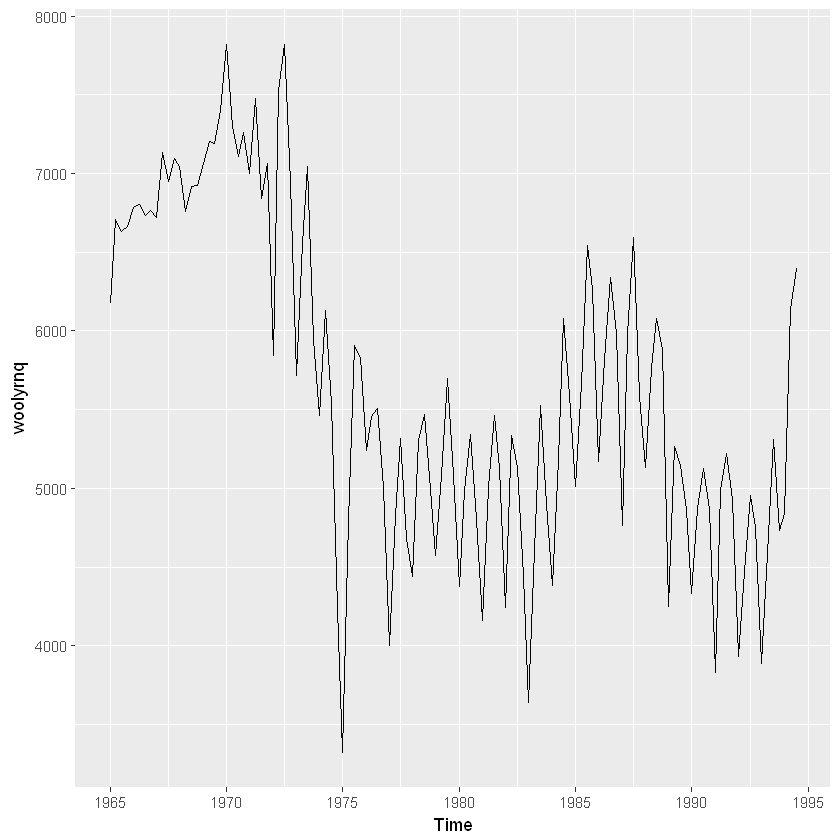

[1] 593.7

[1] 1

[1] 4

[1] 12

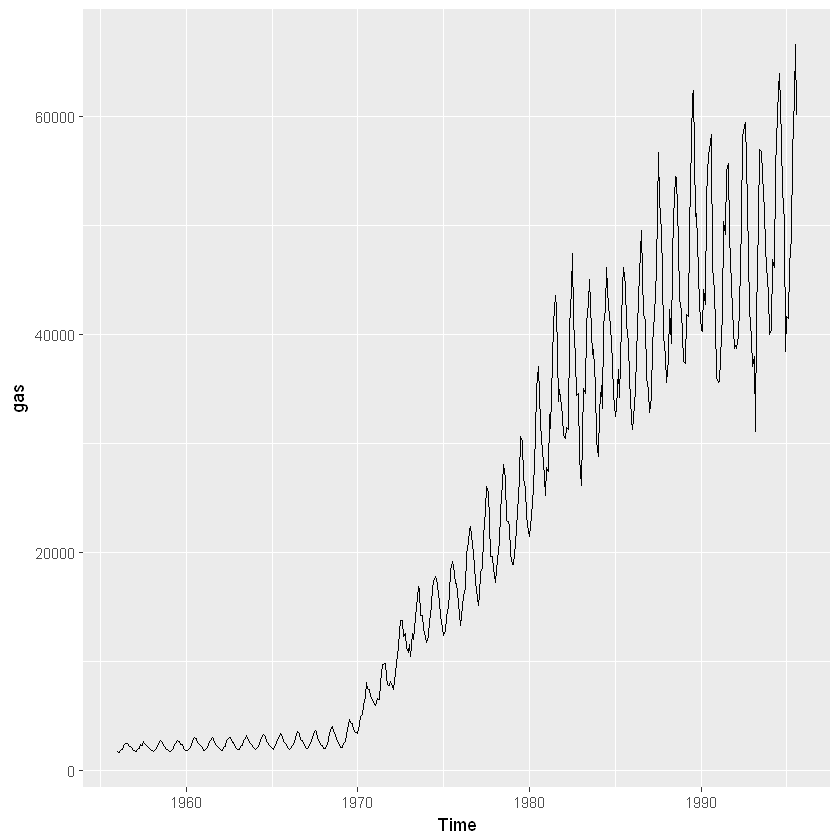

In [5]:
# Plot the data with facetting
autoplot(myts, facets = TRUE)

# Plot the data without facetting
autoplot(myts, facets = FALSE)

# Plot the three series
autoplot(gold)
autoplot(woolyrnq)
autoplot(gas)

# Find the outlier in the gold series
goldoutlier <- which.max(gold)
gold[goldoutlier]

# Look at the seasonal frequencies of the three series
frequency(gold)
frequency(woolyrnq)
frequency(gas)

### Seasonal plots
  
Along with time plots, there are other useful ways of plotting data to emphasize seasonal patterns and show changes in these patterns over time.

A seasonal plot is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed. You can create one using the ggseasonplot() function the same way you do with autoplot().
An interesting variant of a season plot uses polar coordinates, where the time axis is circular rather than horizontal; to make one, simply add a polar argument and set it to TRUE.
A subseries plot comprises mini time plots for each season. Here, the mean for each season is shown as a blue horizontal line.
One way of splitting a time series is by using window() function, which extracts a subset from the object x observed between the times start and end.

`> window(x, start = NULL, end = NULL)
In this exercise, you will load the fpp2 package and use two of its datsets:`

a10 contains monthly sales volumes for anti-diabetic drugs in Australia. In the plots, can you see which month has the highest sales volume each year? What is unusual about the results in March and April 2008?
ausbeer which contains quarterly beer production for Australia. What is happening to the beer production in Quarter 4?
These examples will help you to visualize these plots and understand how they can be useful.

Instructions 

 - Use library() to load the fpp2 package.
 - Use autoplot() and ggseasonplot() to produce plots of the a10 data.
 - Use the ggseasonplot() function and its polar argument to produce a polar coordinate plot for the a10 data.
 - Use the window() function to consider only the ausbeer data starting from 1992.
 - Finally, use autoplot() and ggsubseriesplot() to produce plots of the beer series.

In [ ]:
# Load the fpp2 package
library(fpp2)

# Create plots of the a10 data
autoplot(a10)
ggseasonplot(a10)

# Produce a polar coordinate season plot for the a10 data
ggseasonplot(a10, polar = TRUE)

# Restrict the ausbeer data to start in 1992
beer <- window(ausbeer, start=1992)

# Make plots of the beer data
autoplot(beer)
ggsubseriesplot(beer)